In [23]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [24]:
data = pd.read_csv("star_classification.csv")
X = data.loc[:,('obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z','run_ID','rerun_ID','cam_col','field_ID','spec_obj_ID','redshift','plate','MJD','fiber_ID')]
y = data['class']
print("Label kelas : ", np.unique(y))

Label kelas :  ['GALAXY' 'QSO' 'STAR']


In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[-0.44563362 -0.43460358  0.42552871  0.0597546   0.05492616  0.40396155
   0.0460074   0.00393658 -0.44553451  0.         -0.95255272 -0.71894695
   0.22860866  0.07955728  0.22863291  0.42320321 -1.02134224]
 [ 0.01873981 -0.33992143  0.36340227  0.08804527  0.07245617  1.58440609
   1.18509719  0.09283473  0.01864555  0.          0.93792046 -0.45050918
   1.79791232  0.2770962   1.79792394  1.42072864 -0.0818825 ]
 [-0.4456333  -0.36725058  0.58271274  0.10332677  0.06716517  0.51974532
   0.1500187   0.00880798 -0.44553451  0.         -0.95255272 -0.44379823
  -0.19003674  0.09242283 -0.19002535  0.00185377 -0.55161237]
 [-0.14731149  1.66952317 -1.24910526  0.0049215   0.10220974  1.05990425
   0.80760969  0.01832104 -0.14727846  0.         -0.322395    0.18703053
   1.35896201  0.48677026  1.35894247  1.35492735  1.19519558]
 [ 1.84276754  1.73731007 -0.150242   -0.08005533 -0.09294786 -1.69742091
  -1.76788724 -0.09846826  1.84279178  0.         -0.322395   -0.32971218
   0.333

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[ 1.6755079   1.86247601 -0.54377912 -0.08464091 -0.09462785 -1.68606628
  -1.71152978 -0.09238751  1.67534086  0.          1.56807819  0.71719512
   0.3414124  -0.62124135  0.34142676  0.37454343 -0.55528214]
 [ 1.67538181 -1.63198417 -0.59706467  0.09961436  0.03133949  0.07769124
  -0.19430966 -0.0114429   1.67534086  0.          0.30776273  1.71041487
  -0.15850789 -0.13034629 -0.15852436  0.1340093   0.69243783]
 [-0.63955208  0.36607177  1.63776155 -0.14916014 -0.14623393 -2.27640447
  -2.17087128 -0.10841468 -0.63945184  0.         -0.95255272 -0.90685339
  -0.91116407 -0.7893497  -0.91116081 -0.60307573 -0.36445438]
 [-0.11123857 -1.7784967  -1.27021528 -0.05778528 -0.07167015 -1.38134065
  -1.41520794 -0.07659294 -0.11114164  0.         -0.95255272 -0.20220424
  -1.60793129 -0.56151015 -1.60790841 -2.03964507 -1.40299776]
 [-0.39829835  0.44157202  0.85383348 -0.08298805 -0.04947812 -0.41590617
  -0.10667599  0.00338785 -0.39820036  0.         -0.95255272  0.05281

In [27]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='linear', C=0.1, gamma=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear', random_state=0)

In [28]:
print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Koefisien model :  [[-1.76665734e-03 -8.60078816e-02 -1.21319291e-01  2.96850864e+00
   2.13549820e+00  2.25230625e+00 -2.00621520e+00 -7.14794887e-01
  -1.76631206e-03  0.00000000e+00 -3.47695580e-03  8.41592312e-03
   2.95095157e-01 -2.25928321e+00  2.95097260e-01 -3.82794826e-01
  -2.18684575e-02]
 [ 1.50076441e-03  5.40263136e-03  4.18778352e-03 -2.16690539e-01
   2.14256597e-02  4.40981768e-03  2.31549764e-03 -2.29519553e-01
   1.50107067e-03  0.00000000e+00 -3.13234594e-03  2.21678663e-03
   2.34878727e-02  2.04183852e+01  2.34879415e-02 -5.98823207e-02
   2.64601662e-03]
 [ 5.50047680e-04  1.03135444e-03  1.01763464e-03 -1.91556126e-02
   2.84031500e-02  5.62586420e-04 -9.78048022e-04 -3.07741969e-02
   5.50062043e-04  0.00000000e+00 -1.70532195e-04  2.63089763e-04
   1.15665674e-03  5.47675348e+00  1.15666162e-03 -3.66226472e-03
   6.45775099e-05]]
Bias model :  [ 0.82904376 15.08991957  3.31510209]
Indeks Support Vector :  [   33    35    43 ... 69916 69918 69960]
Support vect

In [29]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['GALAXY' 'QSO' 'GALAXY' ... 'STAR' 'GALAXY' 'GALAXY']


Akurasi : 94.97333333333333 %


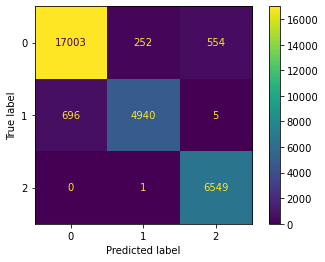

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))